# D212 - Data Mining II
### OFM3 Task 1: Clustering Technique
#### Data Mining II — D212
#### PRFA — OFM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.06.4 : Clustering Techniques
> The graduate applies clustering techniques to accurately predict outcomes of interest.

#### Table of Contents
<ul>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives and Goals of Analysis</a></li>
    <li><a href="#explination-of-clustering">B1: Explanation of Clustering Technique</a></li>
    <li><a href="#assumptions">B2: Assumptions of Clustering Technique</a></li>
    <li><a href="#benefits-of-tool">B3: Benefits of Chosen Tools</a></li>
    <li><a href="#preparation-goals">C1: Data Preparation Goals and Necessary Manipulation</a></li>
    <li><a href="#variable-selection">C2: Variable Selection & Identification</a></li>
    <li><a href="#data-preparation">C3: Preparation of Data</a></li>
    <li><a href="#copy-of-dataset">C4: Copy of Prepared Data Set</a></li>
    <li><a href="#analysis-description">D1: Analysis Description</a></li>
    <li><a href="#classification-analaysis-code">D2: Classification Analysis Code</a></li>
    <li><a href="#model-accuracy">E1: Accuracy of Clustering Model</a></li>
    <li><a href="#model-results">E2: Model Results</a></li>
    <li><a href="#model-limitations">E3: Model Limitations</a></li>
    <li><a href="#recommended-action">E4: Recommended Action</a></li>
    <li><a href="#panopto-recording">F: Panopto Recording</a></li>
    <li><a href="#code-reference">G: Code References</a></li>
    <li><a href="#source-reference">H: Source References</a></li>
</ul>

<a id="research-question"></a>
# A1: Research Question

During the exploration of the Data Analytics life-cycle and the presentation of our findings to the Executive and support team, the focus of the [`WGU Medical Data`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) has been primarily on the concrete data and inquiries regarding re-admissions. In the context of WGU MSDA-D211, when sharing the findings of the data analytics teams, we initiated the creation of visual maps to represent patient perception based on geographical location.

Upon recognizing the potential relationship between patient perception and re-admissions, the executive team assigned us the task of analyzing the survey-specific data. In section `C3: Preparation of Data`, we verified the distribution of the survey questions and observed that they followed a very similiar distributions which may be hiding meaningful information. In order to uncover any additional meaningful insights, we will utilize hierarchical clustering to determine if there is indeed any additional significance to be derived.

**Research Question:**
> Using hierarchical clustering, are we able to gain additional significant insights into the survey data found within the WGU Medical Dataset?

This conforms to the first scenerio of the PA Task 1:

> Scenario 1
>
> One of the most critical factors in customer relationship management that directly affects a company’s long-term profitability is understanding its customers. When a company can better understand its customer characteristics, it is better able to target products and marketing campaigns for customers, resulting in better profits for the company in the long term.
>
> You are an analyst for a telecommunications company that wants to better understand the characteristics of its customers. You have been asked to use principal component analysis (PCA) to analyze customer data to identify the principal variables of your customers, ultimately allowing better business and strategic decision-making.


<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The objective of conducting Hierarchical Clustering Analysis on the survey section of the [`WGU Medical Dataset`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) is to uncover potentially significant insights hidden within the similarly distributed data. By clustering the data, we aim to identify specific areas of focus that can contribute to improving patient perception and reducing WGU Hospital Readmission rates in ways that may not be immediately apparent. Fundamentally, our goal is to examine the survey data and identify groups of patients who could potentially receive better service, while simultaneously reducing readmission rates to meet third-party [`HRRP`](https://www.cms.gov/medicare/medicare-fee-for-service-payment/acuteinpatientpps/readmissions-reduction-program) requirements. This approach has the potential to generate cost benefits for the hospital, patients, and the broader healthcare system as a whole.

<a id="explination-of-clustering"></a>
# B1: Explanation of Clustering Technique

"Hierarchical clustering allows the user to visualize the effect of specifying different numbers of clusters."(Bruce et al., 2020) . It creates a hierarchical structure of clusters by successively merging or splitting clusters. This technique helps to reveal underlying patterns and relationships within a dataset, allowing us to identify distinct groups or clusters that share common characteristics. The resulting hierarchy can be visualized using a dendrogram, which provides a visual representation of the clustering process. Hierarchical clustering is a valuable tool for exploratory data analysis and can assist in making informed decisions and gaining insights from complex datasets.

Dendrogram:
> "Hierarchical clustering lends itself to a natural graphical display as a tree,..." (pg. 306 - Bruce et al., 2020).

### Hierarchical Clustering Example:
![Hierarchical Clustering Example](./hierarchical-clustering-example-datacamp.png)
*Image Citation:* (Keita, 2023)

##### How hierarchical clustering will be performed:
 1. The survey data of all the WGU Medical Dataset patients will be stored in a [`Pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame) for processing.
 2. The [`SciPy`](https://scipy.org/) library provides a function called [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) that allows us to take the dataframe and produce a matrix of data that represents the hierarchical tree data.
 3. Graphically displaying the hierarchical tree data for human consumption with a [`Dendrogram`](https://en.wikipedia.org/wiki/Dendrogram) diagram with the [`SciPy dendrogram function`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). This will provide an easy-to-understand visualization of the clusters and their distance from one another.
 4. Finally, we'll add labels to the clusters with [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster)
 5. Use the final labeled Dendrogram to analyze for additional patterns.

<a id="assumptions"></a>
# B2: Assumption of Clustering Technique
##### Note: "Summarize one assumption of the clustering technique."

The performance assessment calls for a choice between `k-means clustering` and `hierarchical clustering`. I have chosen `hierarchical clustering` for my technique and will specifically be speaking of the assumptions of this technique.

Assumption of Standard Scale:

Hierarchical clustering groups similar observations together based on their distances from each other. The method assumes that the variables used for clustering are on a consistent scale. If the variables have different ranges, the ones with larger ranges could dominate the clustering process. Pre-processing tools such as [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) help mitigate this potential domination by bring all the values into the same scale without distorting them. In the case of the WGU Medical Dataset, the patient survey data is already in a scale of 1-8 so does not need this standardization process to occur.


<a id="benefits-of-tool"></a>
# B3: Benefits of Chosen Tools
 * Language:
   * [`Python 3`](https://www.python.org/)
      * Python is an easy to learn and read programming language which can bring the power of programming easily to statisticians or other scientific fields.
 * Environment
   * [`Jupyter Notebook`](https://jupyter.org/)
      * Jupyter Notebook is a great environment for experimentation and pairing with documentation that experimentation.
 * Graphical
   * [`Matplotlib`](https://matplotlib.org/stable/index.html)
      * Matplotlib is a Python library that provides easy to use capabilities for creating high-quality visualizations and plots.
   * [`Seaborn`](https://seaborn.pydata.org/)
      * Seaborn is built as an extension to Matplotlib to make higher qualify visualization easier and make it easier to work with Pandas DataFrames.
 * Data Manipulation
   * [`Pandas`](https://pandas.pydata.org/docs/)
      * Pandas provide an ability to hold data in a DataFrame format for manipulation. This data is stored similar to DB Tables or Spreadsheets.
   * [`NumPy`](https://numpy.org/)
      * NumPy (Numerical Python) provides scientific calculation abilities to Python and pairs with Pandas for data manipulation.
 * Hierarchical Clustering
   * [`SciPy`](https://scipy.org/) - is a library built on top of [`NumPy`](https://numpy.org/) that provides additional scientific computing capabilities such as below:
      * [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) - calculates how data points should be merged together during hierarchical clustering, based on their similarities or dissimilarities.
      * [`fcluster`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster) - Extract clusters from the hierarchical clustering results by applying a threshold to the linkage matrix.

<a id="preparation-goals"></a>
# C1: Data Preparation Goals and Necessary Manipulation

The [`WGU data dictionary`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) includes a concise section specifically dedicated to the survey data. This includes what the scaling of scores means as well as a data-mapping meaning.

**Scores:**
Scores are ranked in descending order of importance, with 1 indicating the most important and 8 indicating the least important.

**Data-Mapping:**
In the actual dataset provided, the columns of data are labeled as Item1 to Item8. However, the document provides the specific meaning for each Item# column name.

##### Necessary Manipulations:

Using 1 as the most important and 8 as the least important in a survey can potentially be confusing for respondents, as it contradicts the conventional understanding of numerical scales. The typical expectation is that a lower number represents less importance, while a higher number represents more importance.

While browsing around the [MeasuringU Website](measuringu.com), I observed that all the examples that utilized the 'Linear Numeric Scale' followed a convention where the lower end of the scale (e.g., 1) was associated with negative or least values, while higher numbers (e.g., 10) represented positive or most values. Consequently, it appears that our data scaling differs from the traditional approach commonly used within the survey community.

As for the data-mapping we will simply rename the associated Item# column to the data-mapping presented within the data dictionary.

<a id="variable-selection"></a>
# C2: Variable Selection & Identification

Upon examining both the [`WGU Data Dictionary`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip) and the actual [`WGU Medical Dataset`](https://access.wgu.edu/ASP3/aap/content/d8fj4l3d9s94jfu43kf9.zip), with a specific focus on seeking data that aids in understanding the customer/patient, it becomes evident that the relevant information pertains to the survey data. Thus, the subsequent discussion will revolve around the chosen data series extracted from the WGU Medical Dataset.

As we are conducting `hierarchical clustering`, it is essential to ensure that the dataset comprises only the survey data, as the inclusion of any unrelated information could potentially bias the results. Additionally, incorporating extraneous data may lead to an increased dataset size, which could degrade the performance of the clustering algorithm. Therefore, it is crucial to focus solely on the survey data to achieve accurate and meaningful clustering outcomes.

All of these values exhibit a **qualitative** data type, notwithstanding their numeric representation ranging from 1 to 8, as they signify an **ordinal** scale denoting degrees of importance, such as 'most important' or 'least important'.

<br />

| Original Name | Renamed            | DataType    |
|---------------|--------------------|-------------|
| Item1         | Timely_Admission   | Qualitative |
| Item2         | Timely_Treatment   | Qualitative |
| Item3         | Timely_Visits      | Qualitative |
| Item4         | Reliability        | Qualitative |
| Item5         | Options            | Qualitative |
| Item6         | Hours_Of_Treatment | Qualitative |
| Item7         | Courteous_Staff    | Qualitative |
| Item8         | Listening_Doctor   | Qualitative |


In this updated version, I've provided a nice summary for each item in the "Description" column based on the information in the "Renamed" column. If you have any more requests or need further assistance, feel free to let me know!

I've split each bullet by the ":" and placed the relevant information into the first two cells of the table. The "DataType" and "Description" columns are currently empty, as they were not provided in the original data. Feel free to fill in the missing information as needed! If you have any further requests or modifications, let me know.

<a id="data-preparation"></a>
# C3: Preparation of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Timely_Admission    10000 non-null  int64
 1   Timely_Treatment    10000 non-null  int64
 2   Timely_Visits       10000 non-null  int64
 3   Reliability         10000 non-null  int64
 4   Options             10000 non-null  int64
 5   Hours_Of_Treatment  10000 non-null  int64
 6   Courteous_Staff     10000 non-null  int64
 7   Listening_Doctor    10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB
None


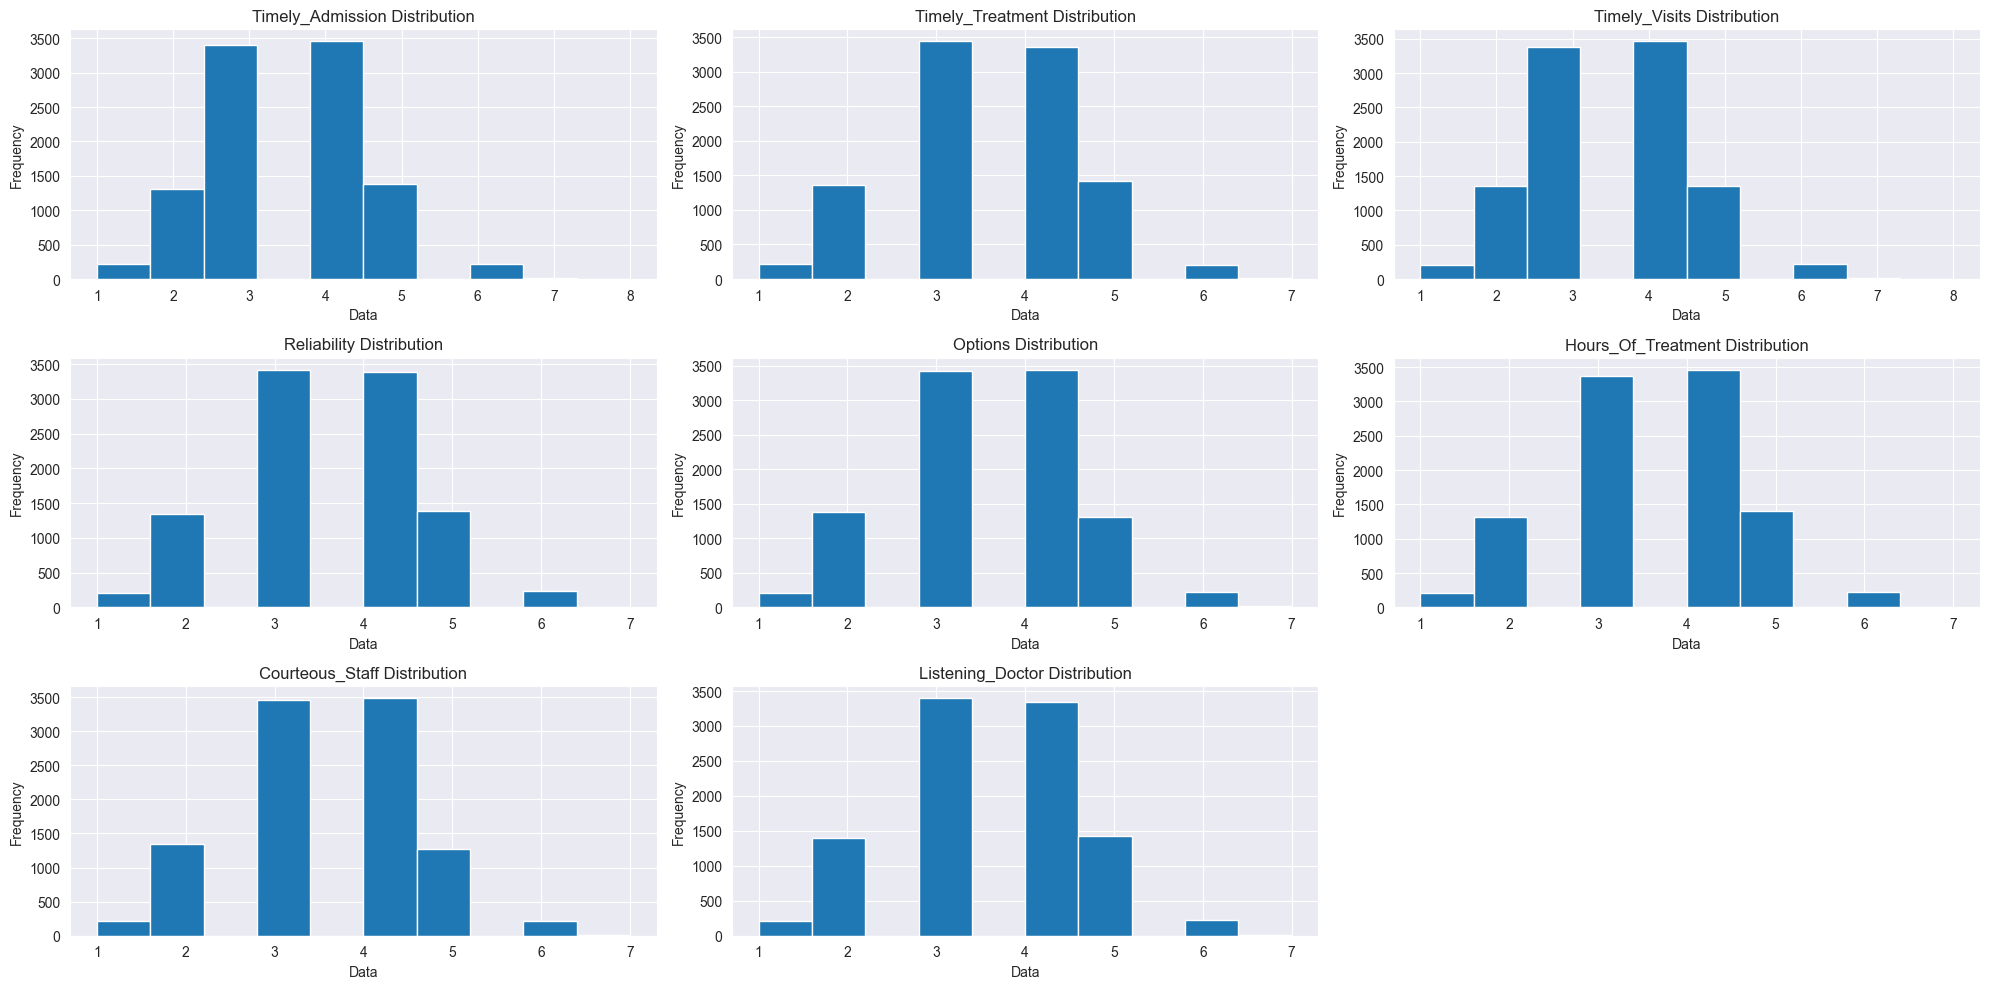

In [129]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score

warnings.filterwarnings('ignore')

medical_data = pd.read_csv('./medical_clean.csv')

survey_data = medical_data[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]

'''
Linear Numeric Scale re-mapping.

The collection of the current survey data seems to be counter to the traditional means of the greater the number
the more positive or significant the meaning.
'''

survey_data_premapping = survey_data.copy(deep=True)

linear_numerical_scale_remapping = {
     1:8
    ,2:7
    ,3:6
    ,4:5
    ,5:4
    ,6:3
    ,7:2
    ,8:1
}
for i in range(1, 9):
    survey_data[f'Item{i}'].map(linear_numerical_scale_remapping)

#TODO: double check the re-mapped values against the pre-mapped

column_renames = {
     'Item1': 'Timely_Admission'
    ,'Item2': 'Timely_Treatment'
    ,'Item3': 'Timely_Visits'
    ,'Item4': 'Reliability'
    ,'Item5': 'Options'
    ,'Item6': 'Hours_Of_Treatment'
    ,'Item7': 'Courteous_Staff'
    ,'Item8': 'Listening_Doctor' #Evidence of active listening from Doctor
}

survey_data.rename(columns=column_renames, inplace=True)

print(survey_data.info())

'''
Exploratory items:
  * Double-checking the distributions of the data
'''
number_of_bins = 8
survey_data_columns = survey_data.columns.tolist()

axes = survey_data.hist(figsize=(20, 10))

for i, ax in enumerate(axes.flatten()):
    if not ax.get_title(): continue
    
    ax.set_xlabel('Data')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{survey_data.columns[i]} Distribution')
plt.tight_layout()
plt.show()

<a id="copy-of-dataset"></a>
# C4: Copy of Prepared Data Set

In [130]:
survey_data.to_csv('./wgu-patient_survey_data.csv', index=False)

<a id="analysis-description"></a>
# D1: Analysis Description

The `WGU Medical Dataset Patient Survey Data` has been subjected to an analysis utilizing `hierarchical clustering`. A known caveat with `hierarchical clustering` is its sensitivity to dataset size. This sensitivity can be further exacerbated depending on the choice of [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) function method parameter.

A crucial factor influencing this analysis is the computational power of the hardware. To be precise, the capacity to cluster and visually represent the data was constrained by the available hardware resources. This presents a unique form of hardware-induced bias: if a potentially superior method demands computational resources beyond what's available, it remains inaccessible for the analysis, thereby influencing outcomes. This scenario underscores a fascinating instance of computational bias, contrasting with the more commonly discussed human biases.

To illustrate, my work spanned multiple platforms, sometimes transitioning between a Windows machine and a macOS machine. My Windows setup lacks a dedicated GPU, a component that typically boosts specific scientific computations. Conversely, when running the same code on my MacBook Air M2, it benefits from a proprietary "M2 chip featuring a dedicated 16-core Neural Engine for neural network computations" (Apple M2, 2023).

Given the significant disparity in capabilities for dendrogram generation between the two machines, it is imperative to ground the analysis on the lowest common computational benchmark or the minimum requisite for the task. As the Windows laptop, devoid of a dedicated GPU or specialized Neural Network Cores, represents this baseline, it was selected to set the computational standard for this analysis.

Out of the available [`linkage()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) methods, where every method successfully provedided a distance matrix, a handful gave the [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) function a hard time with it's clustering and diagram rendering processing depending on the hardware.

Dendrogram failed for hardware without GPU/Neural Network with distance matrices from the following method modes:
 * 'single'-based on two closest objects

Choosing the optimal clustering method can be a challenging task as it heavily relies on the characteristics of the data at hand. In our specific case, we are dealing with the `WGU Medical Data` survey responses, which appear to be relatively straightforward with only 8 possible response options. Upon experimentation, we noticed that some clustering methods resulted in peculiar cluster formations. Ultimately, the `Ward` method stood out by producing a clearer and more comprehensible dendrogram.

The `Ward` method proved advantageous due to its key features:
- **Minimization of variance within clusters:** This property helps create clusters with minimal internal variance, making it suitable for data exhibiting approximately equal-sized and spherical clusters.
- **Sensitivity to outliers and data noise:** While this method is sensitive to outliers, it is relatively reliable for our restricted data range of 1 to 8, instilling confidence in the clustering output.
- **Agglomerative approach:** The agglomerative nature of the `Ward` method aligns well with our survey data, as it starts with individual clusters and progressively merges them.
- **Production of balanced clusters:** The `Ward` method tends to generate clusters with similar sizes, promoting a more balanced clustering outcome.**


<a id="classification-analaysis-code"></a>
# D2: Classification Analysis Code

In [131]:
'''
Function: linkage(...)
Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Description:
  The linkage function is going to be used to create a distance matrix needed to perform hierarchical clustering and associated dendrogram.

  Method Options:
  * single - based on two closest objects
  * complete - based on two farthest objects
  * average - based on arithmetic mean of all objects
  * centroid - based on geometric mean of all objects
  * median - based on the median of all objects
  * ward - based on sum of squares
'''

survey_distance_matrix = linkage(survey_data, method='ward', metric='euclidean', optimal_ordering=False)



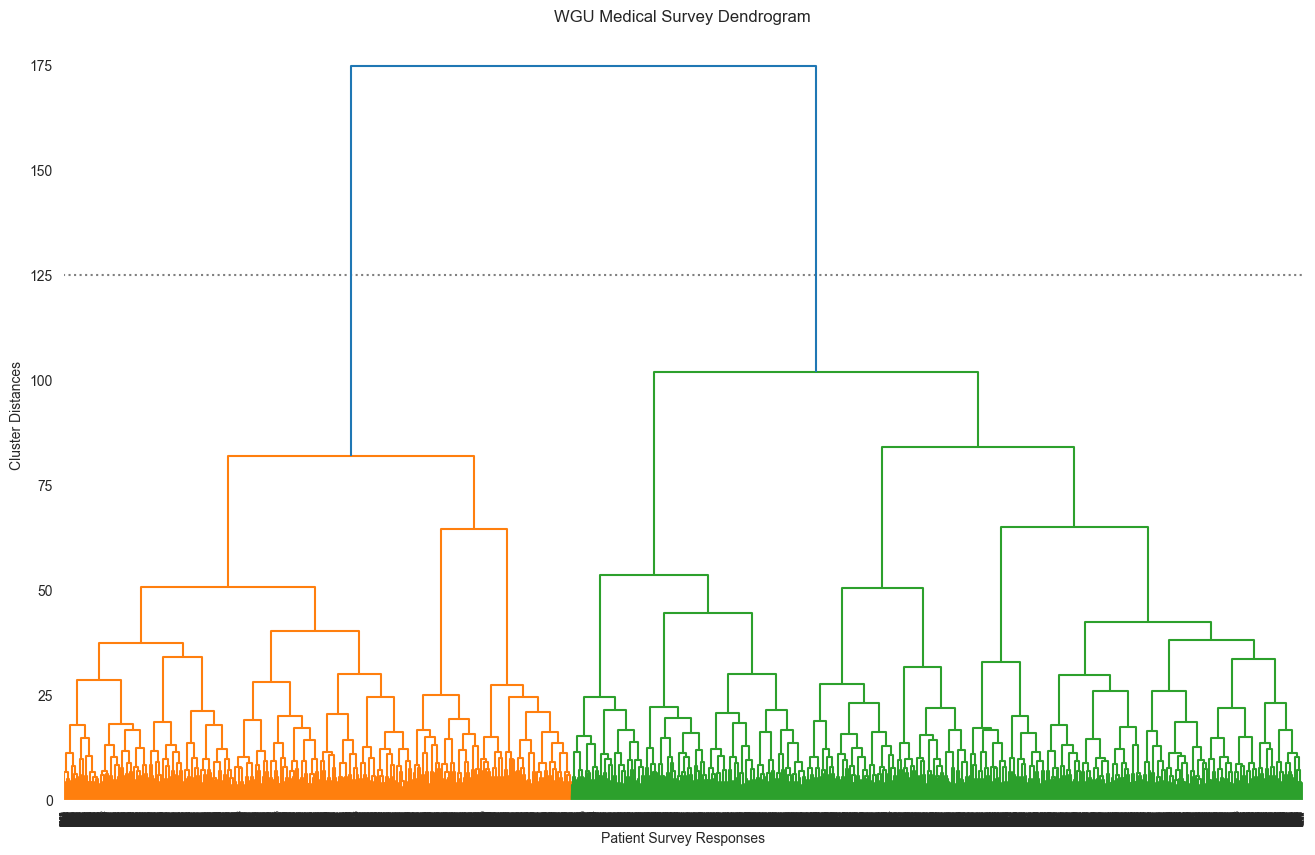

In [132]:
'''
Cluster Visualization: Dendrogram
Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
'''

plt.figure(figsize=(16, 10))
plt.title('WGU Medical Survey Dendrogram')
plt.xlabel('Patient Survey Responses')
plt.ylabel('Cluster Distances')
plt.axhline(y=125, color='gray', linestyle='dotted') #threshold for picking number of clusters
dendrogram_structures = dendrogram(survey_distance_matrix, color_threshold=125)
plt.show()

# #Calculate the number of clusters
# #NOTE: Visual went through each type of diagram. Picked 125 distance value as a potential cutoff, but it doesn't need to be accepted.
# unique_colors = list(set(dendrogram_structures['color_list']))
# number_of_cluster = len(unique_colors)


In [133]:
'''
Function: fcluster(...)
Documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
Description:
    The fcluster function is going to be used to create the labels for the distance matrix.
'''

cluster_labels = 'labels'
survey_data[cluster_labels] = fcluster(survey_distance_matrix, 2, criterion='maxclust')

cluster_counts = survey_data[cluster_labels].value_counts().sort_index()
cluster_count_total = cluster_counts.sum()
clustering_statistics_data = dict()

for i, count in enumerate(cluster_counts):
    clustering_statistics_data[f'Cluster{i + 1}'] = {
        'Count': count,
        'Percentage': f'{(count / cluster_count_total):.2%}'
    }

clustering_statistics = pd.DataFrame(clustering_statistics_data)

clustering_statistics

,Cluster1,Cluster2
Count,4105,5895
Percentage,41.05%,58.95%


In [134]:
'''
Save Clustering Statistics to CSV file.
'''
clustering_statistics.to_csv('./clustering_statistics.csv')

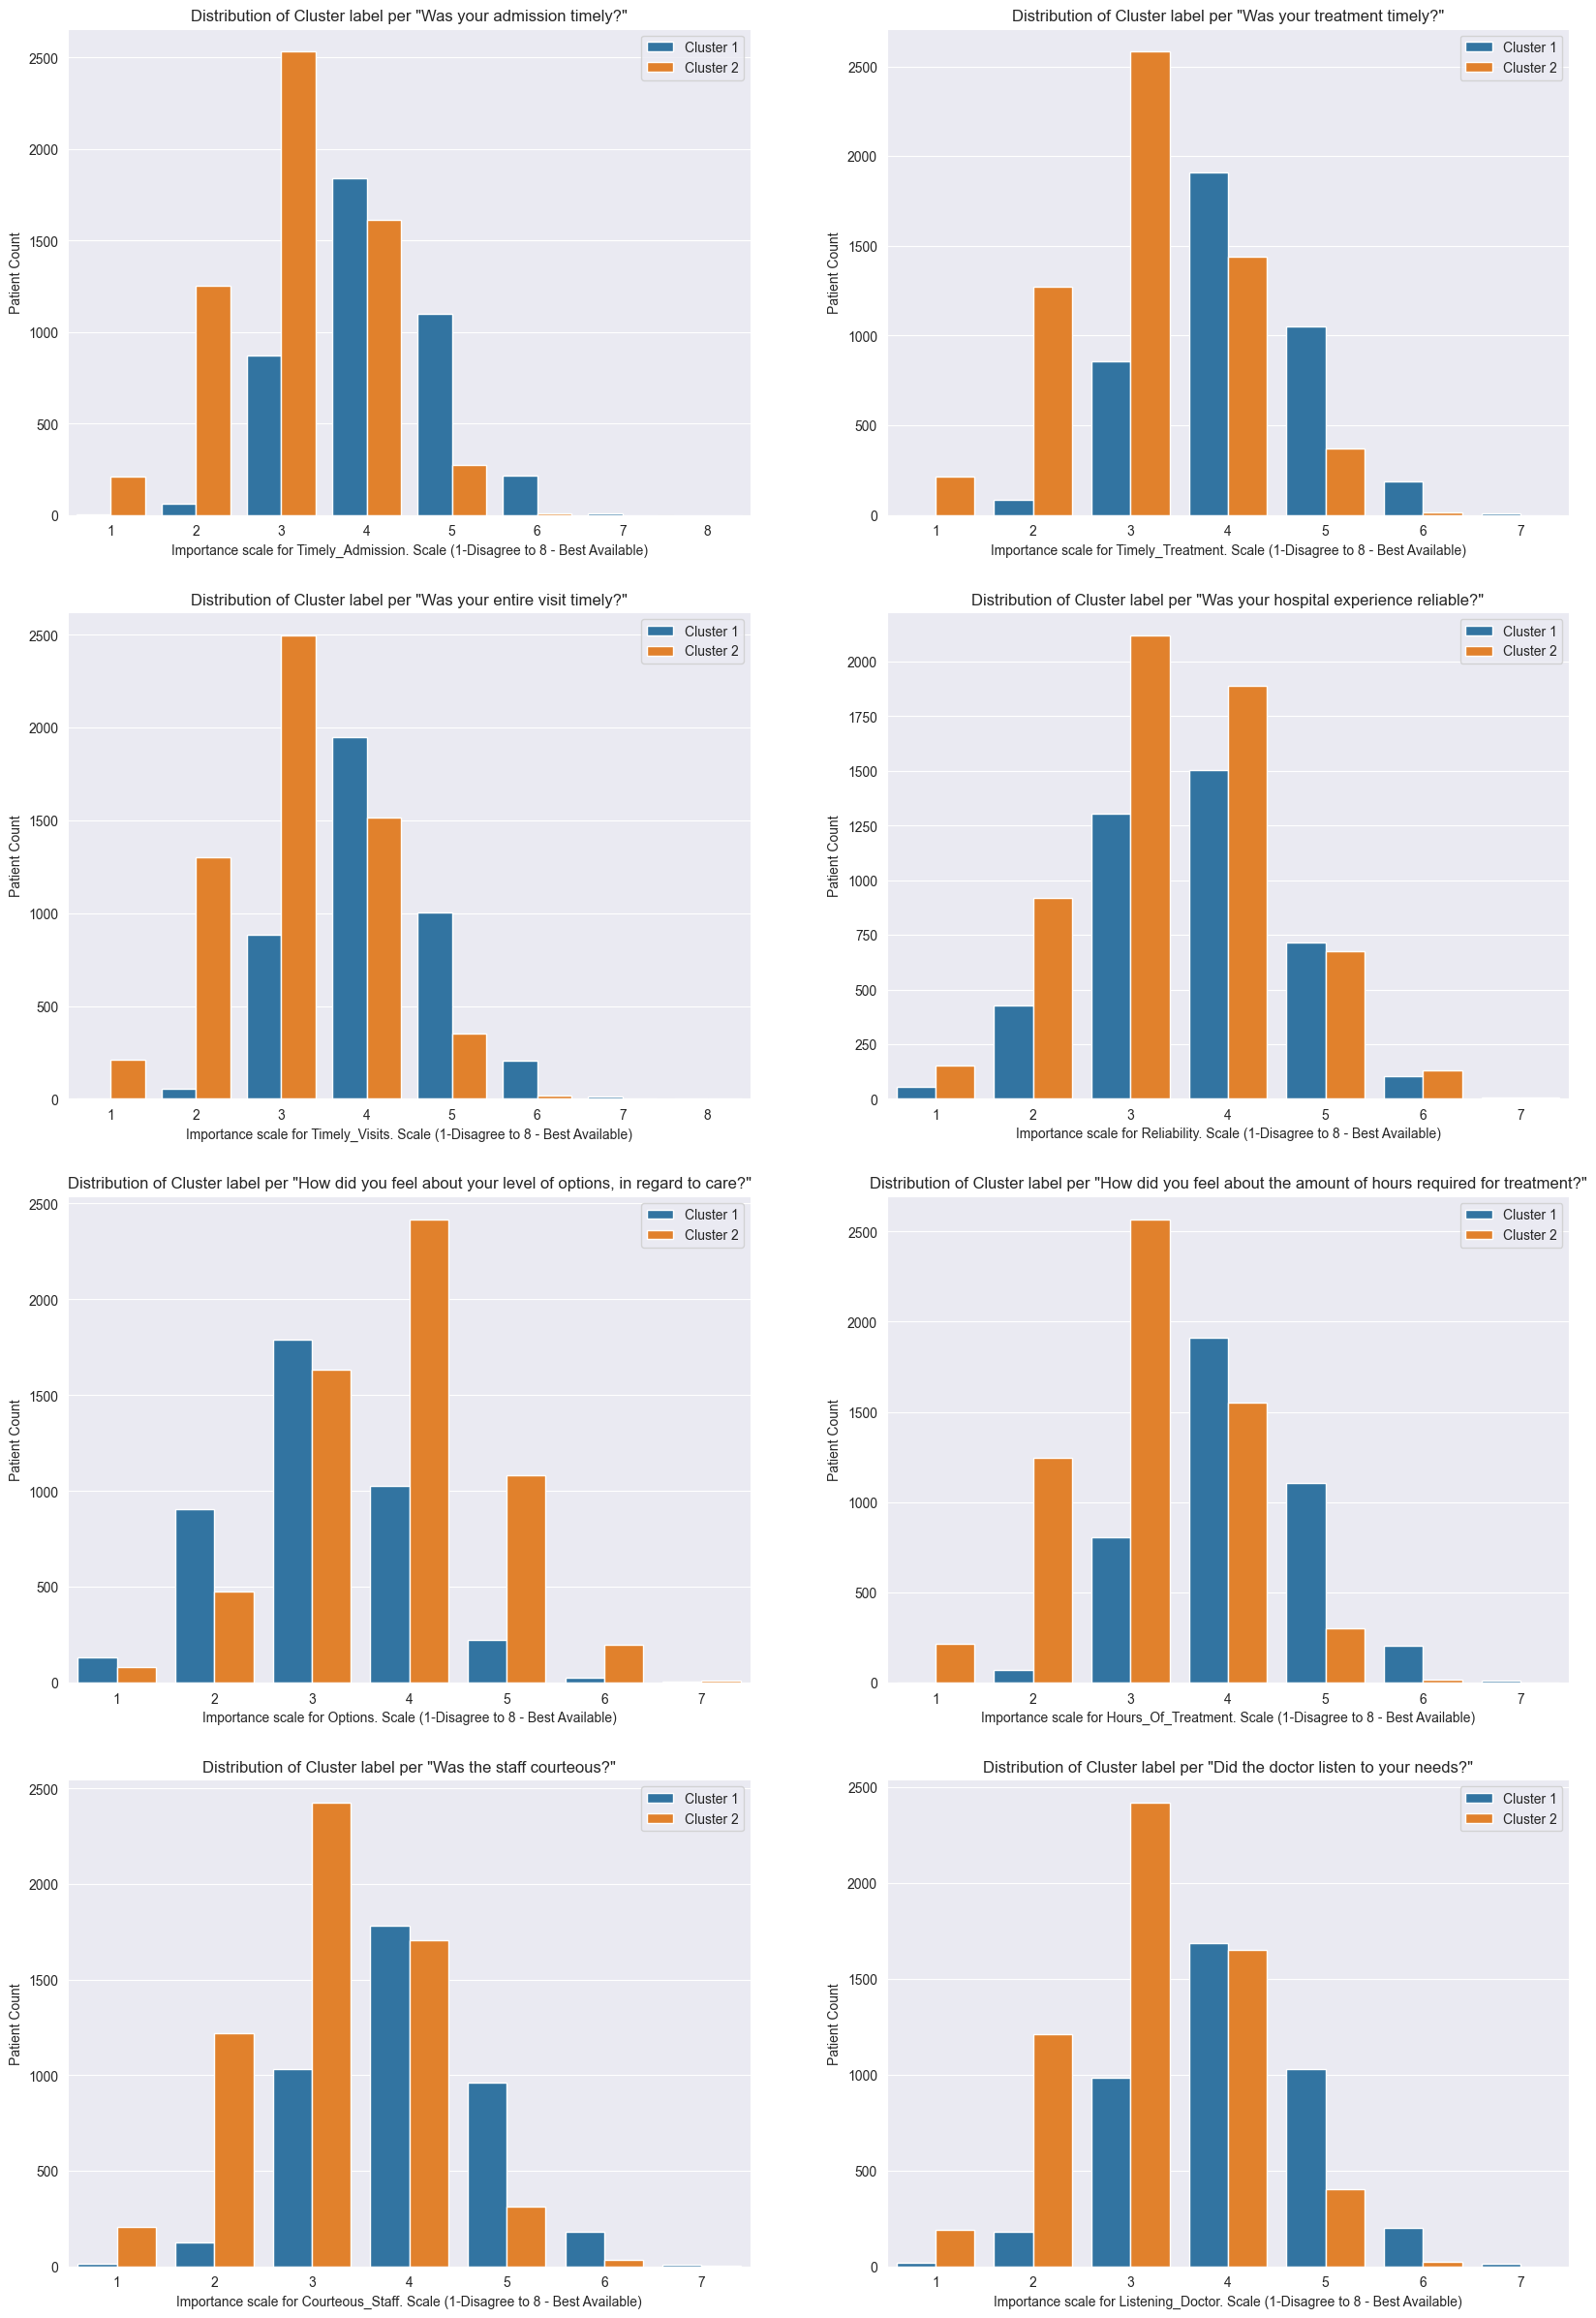

In [135]:
#4x2
plt.figure(figsize=(20,30))

column_display_name = {
    'Timely_Admission' : 'Was your admission timely?'
    ,'Timely_Treatment': 'Was your treatment timely?'
    ,'Timely_Visits' : 'Was your entire visit timely?'
    ,'Reliability': 'Was your hospital experience reliable?'
    ,'Options': 'How did you feel about your level of options, in regard to care?'
    ,'Hours_Of_Treatment': 'How did you feel about the amount of hours required for treatment?'
    ,'Courteous_Staff': 'Was the staff courteous?'
    ,'Listening_Doctor': 'Did the doctor listen to your needs?'
}

cluster_groups = ['Cluster 1', 'Cluster 2']
for i, column in enumerate(survey_data.columns):
    if column == 'labels': continue

    display_friendly_column = column_display_name.get(column)

    plt.subplot(4, 2, (i+1)) #plots start at 1
    plt.title(f'Distribution of Cluster label per "{display_friendly_column}"')
    sns.countplot(data=survey_data, x=column, hue=cluster_labels)
    plt.legend(cluster_groups)
    plt.ylabel('Patient Count')
    plt.xlabel(f'Importance scale for {column}. Scale (1-Disagree to 8 - Best Available)')

In [136]:

#Same style of selection    
#print(survey_data[survey_data['labels'] == 1]['Timely_Admission'])
#print(survey_data.loc[survey_data['labels'] == 1, 'Timely_Admission'])

'''
Model Results
Get the means and medians per survey question per cluster
'''
statistics_data= {
    'Cluster1_Means': list(),
    'Cluster1_Medians': list(),
    'Cluster2_Means': list(),
    'Cluster2_Medians': list()
}
for i, column in enumerate(survey_data.columns):
    if column == 'labels': continue

    cluster1 = survey_data.loc[survey_data['labels'] == 1, column]
    cluster2 = survey_data.loc[survey_data['labels'] == 2, column]

    statistics_data['Cluster1_Means'].append(cluster1.mean())
    statistics_data['Cluster1_Medians'].append(cluster1.median())

    statistics_data['Cluster2_Means'].append(cluster2.mean())
    statistics_data['Cluster2_Medians'].append(cluster2.median())

#print(statistics_data)

survey_columns = [column for column in survey_data.columns if column != 'labels']
survey_summary_statistics = pd.DataFrame(data=statistics_data, index=survey_columns)

survey_summary_statistics

,Cluster1_Means,Cluster1_Medians,Cluster2_Means,Cluster2_Medians
Timely_Admission,4.134957,4.0,3.089737,3.0
Timely_Treatment,4.104507,4.0,3.090416,3.0
Timely_Visits,4.109622,4.0,3.094317,3.0
Reliability,3.663094,4.0,3.412044,3.0
Options,3.095493,3.0,3.776421,4.0
Hours_Of_Treatment,4.146163,4.0,3.088210,3.0
Courteous_Staff,4.008526,4.0,3.135708,3.0
Listening_Doctor,4.014860,4.0,3.157930,3.0


In [137]:
'''
Save summary statistics to csv file
'''
survey_summary_statistics.to_csv('./survey_summary_statistics.csv')

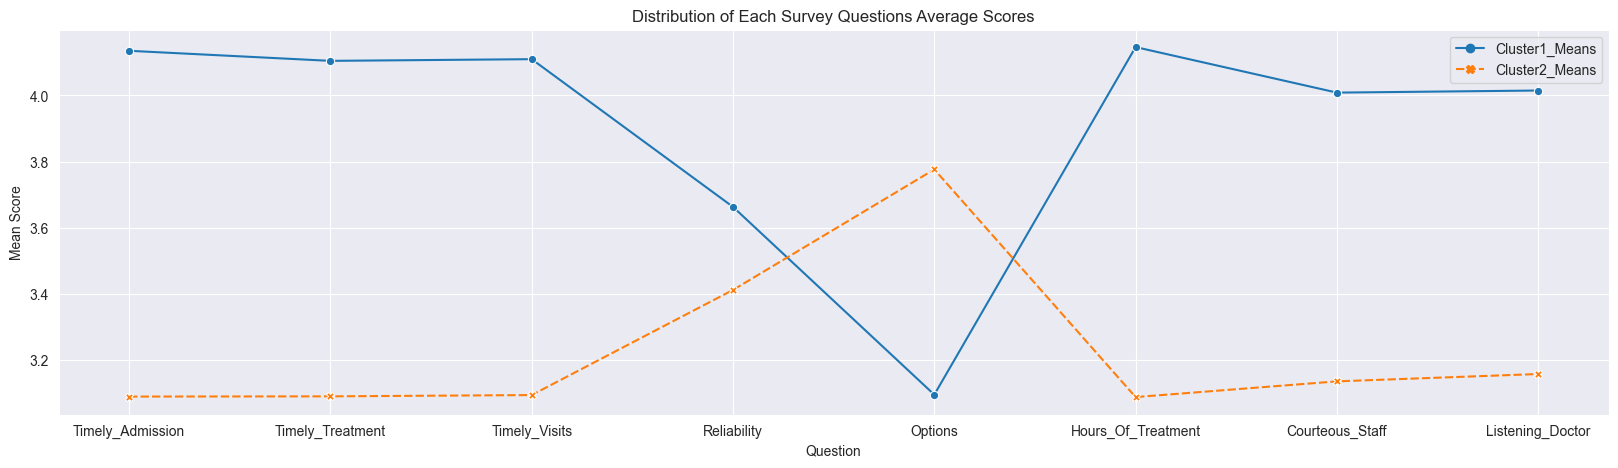

In [144]:
cluster_means = survey_summary_statistics[['Cluster1_Means', 'Cluster2_Means']]

plt.figure(figsize=(20,5))
plt.title('Distribution of Each Survey Questions Average Scores')
plt.xlabel('Question')
plt.ylabel('Mean Score')
sns.lineplot(data=cluster_means, markers=True)

'''
Save figure to re-displaying in other Performance Assessment sections without re-rendering.
'''
plt.savefig('./mean-of-questions-per-cluster.png')

plt.show()

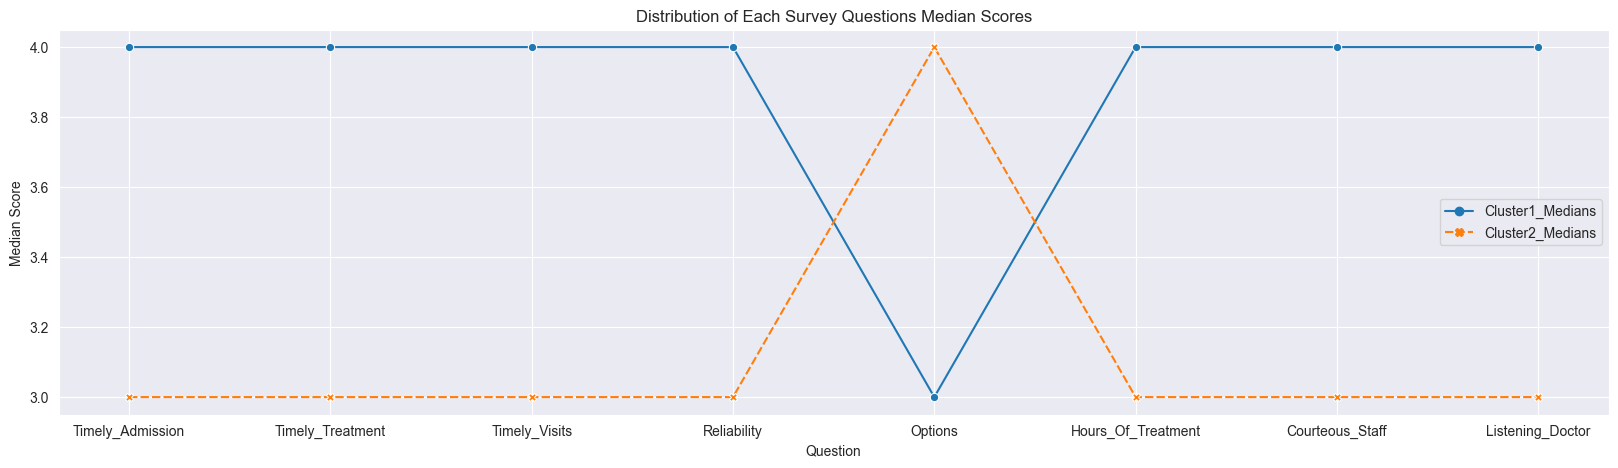

In [145]:
cluster_medians = survey_summary_statistics[['Cluster1_Medians', 'Cluster2_Medians']]

plt.figure(figsize=(20,5))
plt.title('Distribution of Each Survey Questions Median Scores')
plt.xlabel('Question')
plt.ylabel('Median Score')
sns.lineplot(data=cluster_medians, markers=True)

'''
Save figure to re-displaying in other Performance Assessment sections without re-rendering.
'''
plt.savefig('./median-of-questions-per-cluster.png')

plt.show()

<a id="model-accuracy"></a>
# E1: Accuracy of Clustering Model

Unsupervised lacks having labeled data directly for calculating accuracy. However [`scikit-learn`](https://scikit-learn.org/) provides metrics to help generate scores that help determine if the unsupervised clusters/labels generated are good or not. The [`Clustering Metrics`](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) submodule provides functions for supervised and unsupervised learning.

| Metric Function              | Task               | Evaluation Type |
|------------------------------|--------------------|-----------------|
| adjusted_rand_score          | Clustering         | Unsupervised    |
| adjusted_mutual_info_score   | Clustering         | Unsupervised    |
| completeness_score           | Clustering         | Unsupervised    |
| homogeneity_score            | Clustering         | Unsupervised    |
| mutual_info_score            | Clustering         | Unsupervised    |
| normalized_mutual_info_score | Clustering         | Unsupervised    |
| silhouette_score             | Clustering         | Unsupervised    |
| calinski_harabasz_score      | Clustering         | Unsupervised    |
| davies_bouldin_score         | Clustering         | Unsupervised    |
| fowlkes_mallows_score        | Clustering         | Unsupervised    |
| v_measure_score              | Clustering         | Unsupervised    |
| contingency_matrix           | Cluster Comparison | Unsupervised    |
| contingency_matrix           | Classification     | Supervised      |
| contingency_matrix           | Labeling           | Unsupervised    |
| completeness_score           | Classification     | Supervised      |
| fowlkes_mallows_score        | Classification     | Supervised      |
| homogeneity_score            | Classification     | Supervised      |
| mutual_info_score            | Classification     | Supervised      |
| normalized_mutual_info_score | Classification     | Supervised      |
| v_measure_score              | Classification     | Supervised      |
| completeness_score           | Labeling           | Supervised      |
| fowlkes_mallows_score        | Labeling           | Supervised      |
| homogeneity_score            | Labeling           | Supervised      |
| mutual_info_score            | Labeling           | Supervised      |
| normalized_mutual_info_score | Labeling           | Supervised      |
| v_measure_score              | Labeling           | Supervised      |

Reading the documentation for the [`Scikit-Learn`](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) for measuring accuracy without `ground truth`[^1] two metrics stood-out for unsupervised learning. These two methods that seem reasonable for generating a metric to see if the unsupervised clustering was done nicely include `Silhouette Score` and `Calinski-Harabasz Score`.

##### Silhouette Score:
>"The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters." 

(Silhouette (clustering) 2023)

<br /><br />
[^1]: "Ground truth refers to the actual nature of the problem that is the target of a machine learning model, reflected by the relevant data sets associated with the use case in question. Supervised machine learning models are trained on labeled data that are considered “ground truth” for the model to identify patterns that predict those labels on new data." (C3.ai, Ground truth 2022)

In [142]:
'''
Silhouette Score
'''
ss_x = survey_data[survey_columns]
ss_y = survey_data['labels']
silhouette_score = silhouette_score(ss_x, ss_y, metric='euclidean')

print(f'Silhouette Score: [{silhouette_score}]')

Silhouette Score: [0.1483694611652974]


#### Silhouette Score Results
The Silhouette Score was `~0.148`. 

Rules for judging this score are as follows:
 1. 0 indicates there is overlap and what defines a cluster is ambitious. 
 2. Scores close to 1 indicate highly defined clusters 
 3. Scores closer to -1 means data is being assigned to the wrong clusters.

Summary:
    With the Silhouette Score being positive (above 0) at `~0.148` it indicates that on average, the data points are relatively closer to their own cluster's center than to other cluster centers, but the overall separation between clusters is not very well-defined.


##### Calinsky-Harabasz Score *(Variance Ratio Criterion)*:

This is a score that's main focus is on the compactness of the cluster labels.

In [143]:
'''
Calinski-Harabasz Score
'''
chs_x = survey_data[survey_columns]
chs_y = survey_data['labels']
calinsky_harbabazu_score = calinski_harabasz_score(chs_x, chs_y)

print(f'Calinski-Harabasz Score: [{calinsky_harbabazu_score}]')

Calinski-Harabasz Score: [2172.4845456567186]


#### Calinski-Harabazu Score Results:

The Calinsky-Harabasz Score is `~2172`

Higher scores indicate suggests that the clustering has resulted in well-separated and compact clusters, which this score is indicating.

Summary:
    The clusters are well-defined and compact.


##### Accuracy Conclusion:

This situation between the Silhouette and Calinsky-Harabasz score is not contradictory, but it does indicate that the clustering solution may have some overlapping or less well-separated regions despite having compact clusters overall. 

<a id="model-results"></a>
# E2: Model Results

When gather then mean and median of the results of the clustering two charts where generated. These two charts show the information in a constant shape.

#### Means of answers of survey per cluster
![means-image](./mean-of-questions-per-cluster.png)

#### Medians of answers of survey per cluster
![medians-image](./median-of-questions-per-cluster.png)

##### Results:
It is evident that the `Ward` method has resulted in the creation of well-balanced clusters. Both `Cluster 1` and `Cluster 2` exhibit an almost 50/50 split in their composition (~42/~58), and they are complete opposites of each other. This situation resembles the political scenario where opposing opinions are evenly distributed, leading to a divided consensus.

To elaborate further, we observe that when one cluster scores a survey question higher, the other cluster scores it lower. This pattern holds true for all survey questions except for `Options`, which is ambiguously defined in the `WGU Data Dictionary`. The meaning of `Options` remains unclear, whether it pertains to medical choices, treatments, physicians, etc., or encompasses all choices available at a hospital. The lack of clarity surrounding `Options` makes it's challenging to understand why this specific survey question is the only one that deviates from the overall theme of scoring differences between the two clusters.

The survey data point of `Reliability` proved to be another intriguing aspect. It indeed followed the trend where if Cluster 1 scored it higher, Cluster 2 would score it lower. However, it is worth noting that the disparity between the scores is not as significant as observed in the case of `Timely Admission`, `Timely Treatment`, `Timely Visits`, `Hours of Treatment`, `Courteous Staff`, and `Evidence of active listening from doctor`. Also, pointing out that this is only noticed when looking at means as median values do not show this difference.

This observation may indicate that the concept of reliability can have a more subjective interpretation among individuals compared to aspects such as punctuality or the duration of treatment. Different people may perceive and evaluate reliability differently, leading to less pronounced discrepancies in scoring between the two clusters for this particular survey question.


<a id="model-limitations"></a>
# E3: Model Limitations

Hierarchical clustering has quite a few limitations, but I will focus on the ones that impacted this `Performance Assessment` directly.

As a Senior Software Engineer with experience in multiple environments and hardware configurations, I have observed that hierarchical clustering's performance can be significantly impacted by the underlying hardware specifications. For instance, in my day-to-day work, using a DELL system with an Intel Core i7 processor and 16GB of RAM but no dedicated GPU, the clustering process failed when employing the `Single Method`. However, running the same code on my MacBook Air, equipped with an M2 processor boasting 16-core dedicated neural network cores and 24GB of RAM, successfully completed the clustering in `Single Method` mode. This disparity presents a noteworthy challenge for analytics teams that require such calculations. They may need to opt for highly powered `Cloud Services with dedicated GPUs`, or alternatively, allocate additional resources to ensure team members' desktops/laptops possess sufficient processing power to handle these computations effectively.

Another difficulty associated with hierarchical clustering is the lack of a pre-defined method for determining the ideal number of clusters in unsupervised settings.

Furthermore, a notable limitation arises once the `Hierarchical Clustering` computation is completed—the resulting clusters are fixed. This differs from k-Means clustering, which can dynamically adjust its labels after the initial computation. This static nature of hierarchical clustering labels can present challenges when working with datasets like the `WGU Medical Data` survey data, where post-computation label adjustments are required.

In summary, hierarchical clustering presents challenges related to computational complexity, hardware dependency, identifying the appropriate number of clusters, and the fixed nature of the resulting clusters after computation, which may require careful consideration and resource allocation for teams engaged in such analyzes.

<a id="recommended-action"></a>
# E4: Recommended Action

After analyzing the data using `Hierarchical Clustering`, several issues have come to light, leading to the following recommendations. Let's first address the problems identified:

1. **Vagueness in the `WGU Data Dictionary` and Scaling Orientation:** The `WGU Data Dictionary` lacks detailed descriptions for the survey questions, and the scaling is counterintuitive, contrary to the normal human nominal scale where bigger numbers indicate greater values.

- *Vagueness Problem:*
    - For instance, the question `Options` lacks descriptive guidance, leading to various interpretations depending on the survey respondent. The meaning of `Options` could range from the number of choices offered, medications available, practitioners accessible, payment methods, or even as simple as food options. Without contextual clarity, respondents may attribute different meanings, making the data less reliable.
    - Similarly, the term `Reliability` also lacks descriptive guidance. The ambiguity arises around what or who is considered reliable. Is it pertaining to pre-care, during care, or post-care reliability? The absence of a proper description allows survey takers to interpret the term subjectively, resulting in diverse responses.

2. **Issues with Value Scaling:**

- *Scaling Meaning:*
    - The use of a wide-ranging scale (1-8) in this survey introduces challenges in interpreting the differences between score buckets. With subjective opinions from patients, distinguishing the significance between, for example, a score of 7 and 8 becomes more ambiguous, reducing the precision of the gathered insights.

- *Reverse Natural Scaling:*
    - The survey employs a reversed scaling system where 1 is considered the *most* important, and 8 is the *least* important. This is counter to the usual convention of asking respondents to rate something on a scale of 1 to 5, where 5 represents the highest importance. This inconsistency opens the survey to respondents instinctively providing responses that are opposite to their intended opinions, undermining the meaningfulness of the collected data.

To enhance the quality and interpretability of the survey results, it is crucial to provide more comprehensive descriptions for the survey questions in the `WGU Data Dictionary`. Additionally, considering a more intuitive scaling system, such as a 1-5 scale with 5 indicating the highest importance, may yield clearer and more reliable insights from the survey participants.


<a id="anopto-recording"></a>
# F: Panopto Recording

<a id="panopto-recording"></a>
# G: Code References

<a id="source-reference"></a>
# H: Source References

 * Bruce, P., Bruce, A., &amp; Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using r and python. O’Reilly Media. <br /><br />
 * Keita, Z. (2023, January 19). An introduction to hierarchical clustering in Python. DataCamp. [https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python](https://www.datacamp.com/tutorial/introduction-hierarchical-clustering-python) <br /><br />
 * Jeff Sauro, P. (2018, August 15). 15 common rating scales explained. MeasuringU. [https://measuringu.com/rating-scales/](https://measuringu.com/rating-scales/) <br /><br />
 * Wikimedia Foundation. (2023, July 4). Apple M2. Wikipedia. https://en.wikipedia.org/wiki/Apple_M2 <br /><br />
 * Ground truth. C3 AI. (2022, March 15). https://c3.ai/glossary/machine-learning/ground-truth/ <br /><br /> 
 * Wikimedia Foundation. (2023a, May 17). Silhouette (clustering). Wikipedia. https://en.wikipedia.org/wiki/Silhouette_(clustering) <br /><br /> 